In [58]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/Social/")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_json('waitrose.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24802 entries, 0 to 24801
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 24802 non-null  datetime64[ns]
 1   id                         24802 non-null  int64         
 2   id_str                     24802 non-null  int64         
 3   text                       24802 non-null  object        
 4   source                     24802 non-null  object        
 5   truncated                  24802 non-null  bool          
 6   in_reply_to_status_id      9288 non-null   float64       
 7   in_reply_to_status_id_str  9288 non-null   float64       
 8   in_reply_to_user_id        11291 non-null  float64       
 9   in_reply_to_user_id_str    11291 non-null  float64       
 10  in_reply_to_screen_name    11048 non-null  object        
 11  user                       24802 non-null  object        
 12  geo      

In [8]:
#Checking Missing Values

df.isnull().sum()

created_at                       0
id                               0
id_str                           0
text                             0
source                           0
truncated                        0
in_reply_to_status_id        15514
in_reply_to_status_id_str    15514
in_reply_to_user_id          13511
in_reply_to_user_id_str      13511
in_reply_to_screen_name      13754
user                             0
geo                          24775
coordinates                  24775
place                        24029
contributors                 24802
is_quote_status                  0
extended_tweet               16365
quote_count                      0
reply_count                      0
retweet_count                    0
favorite_count                   0
entities                         0
favorited                        0
retweeted                        0
filter_level                     0
lang                             0
matching_rules                   0
display_text_range  

In [9]:
# get the records with missing value
df[df.extended_tweet.isnull()]

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-07-29 10:28:58,1288421250000000000,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Jul 28 16:29:56 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
1,2020-11-17 16:31:19,1328737494000000000,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.328654e+18,1.328654e+18,1.327758e+18,1.327758e+18,...,[{'tag': None}],"[57, 133]",None,NaN,NaN,NaN,None,None,None,NaN
2,2020-02-28 20:19:01,1233486785000000000,1233486785000000000,@waitrose the wine you delivered yesterday was...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
3,2020-11-13 09:21:04,1327179666000000256,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Nov 13 07:00:00 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
4,2020-06-04 20:54:01,1268647218000000000,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 04 16:31:25 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24793,2020-12-22 13:28:58,1341375179000000000,1341375179000000000,@MissLauraMarcus @waitrose We have cauliflower...,"<a href=""https://about.twitter.com/products/tw...",False,1.341348e+18,1.341348e+18,5.504155e+08,5.504155e+08,...,[{'tag': None}],"[27, 69]",None,NaN,NaN,NaN,None,None,None,NaN
24796,2020-06-25 10:56:30,1276106992000000000,1276106992000000000,RT @GreenJennyJones: I usually loathe companie...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 25 08:28:38 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
24798,2020-02-09 10:12:11,1226448702000000000,1226448702000000000,RT @SAMPAuk_: @JoJomorris1 @waitrose @Tesco @M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Sat Apr 29 16:18:47 +0000 2017...,NaN,NaN,NaN,None,None,None,NaN
24799,2020-03-24 08:36:49,1242369768000000000,1242369768000000000,@TeaTrayThomas @NHSuk @sainsburys @Tesco @asda...,"<a href=""http://twitter.com/download/android"" ...",False,1.242354e+18,1.242354e+18,2.207186e+08,2.207186e+08,...,[{'tag': None}],"[71, 89]",None,NaN,NaN,NaN,None,None,None,NaN


In [14]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['extended_tweet'], inplace=True)

# check missing value again
df.isnull().sum()

created_at                      0
id                              0
id_str                          0
text                            0
source                          0
truncated                       0
in_reply_to_status_id        4222
in_reply_to_status_id_str    4222
in_reply_to_user_id          2881
in_reply_to_user_id_str      2881
in_reply_to_screen_name      3011
user                            0
geo                          8435
coordinates                  8435
place                        8028
contributors                 8437
is_quote_status                 0
extended_tweet                  0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
display_text_range           2638
retweeted_stat

In [15]:
a1 = df[['extended_tweet','quote_count','reply_count','retweet_count','favorite_count']]

In [16]:
a1

,extended_tweet,quote_count,reply_count,retweet_count,favorite_count
5,{'full_text': '@Peterkay2k11 @Morrisons @Tesco...,0,0,0,0
6,{'full_text': '@DrJDrooghaag @GeekOnTheLoose @...,0,1,0,4
9,"{'full_text': ""@mcgjingsorbust @waitrose We us...",0,0,0,0
10,{'full_text': 'I signed the open letter asking...,0,1,0,0
14,{'full_text': 'I signed the open letter asking...,0,1,0,0
...,...,...,...,...,...
24791,{'full_text': '@waitrose Hawkhurst your securi...,0,1,0,0
24794,{'full_text': 'I signed the open letter asking...,0,1,0,1
24795,"{'full_text': ""@MaryRegW @Chisholm4Trail @wait...",0,0,0,1
24797,{'full_text': '@YummyTim @Wine_and_Rugby @UKHo...,0,1,0,2


In [75]:
#random sample select
rd = a1.sample(n=2000)

rd.to_csv('rd.csv', index=False)

print(rd)

                                          extended_tweet  quote_count  \
22311  {'full_text': 'Okay @waitrose, pavements are f...            3   
18985  {'full_text': "@La_Fee_Verte__ @waitrose Belie...            0   
6989   {'full_text': '@waitrose hi just wondering if ...            0   
5124   {'full_text': '@tes @debs_cares I saw so many ...            0   
23315  {'full_text': 'Our 100% Renewable #Biomethane ...            0   
...                                                  ...          ...   
17822  {'full_text': '@MountMerlin @orangulandtrust @...            0   
19241  {'full_text': '@MarcusRashford @AldiUK @asda @...            0   
14518  {'full_text': '@DundasPizza Looks like @BirdsE...            0   
8832   {'full_text': "@HindChristopher @HNM_PMurray @...            0   
14077  {'full_text': 'Disgusting Selfish IM OK JACK @...            0   

       reply_count  retweet_count  favorite_count  
22311            3              2               8  
18985            0 

In [76]:
#Splitting the Strings in the category column

catsplit = rd['extended_tweet'].str.split('display_text_range', expand=True)
catsplit.head()

,0,1
22311,"{'full_text': 'Okay @waitrose, pavements are f...","': [0, 179], 'entities': {'hashtags': [], 'url..."
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...","': [26, 195], 'entities': {'hashtags': [], 'ur..."
6989,{'full_text': '@waitrose hi just wondering if ...,"': [0, 156], 'entities': {'hashtags': [], 'url..."
5124,{'full_text': '@tes @debs_cares I saw so many ...,"': [17, 286], 'entities': {'hashtags': [{'text..."
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,"': [0, 166], 'entities': {'hashtags': [{'text'..."


In [77]:
#Renaming category column

catsplit = catsplit.rename(columns={0:'text'})
catsplit.head()

,text,1
22311,"{'full_text': 'Okay @waitrose, pavements are f...","': [0, 179], 'entities': {'hashtags': [], 'url..."
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...","': [26, 195], 'entities': {'hashtags': [], 'ur..."
6989,{'full_text': '@waitrose hi just wondering if ...,"': [0, 156], 'entities': {'hashtags': [], 'url..."
5124,{'full_text': '@tes @debs_cares I saw so many ...,"': [17, 286], 'entities': {'hashtags': [{'text..."
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,"': [0, 166], 'entities': {'hashtags': [{'text'..."


In [78]:
#Adding categories to the dataframe

rd['text'] = catsplit['text']

rd.head()

,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,text
22311,"{'full_text': 'Okay @waitrose, pavements are f...",3,3,2,8,"{'full_text': 'Okay @waitrose, pavements are f..."
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...",0,0,0,0,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie..."
6989,{'full_text': '@waitrose hi just wondering if ...,0,1,0,0,{'full_text': '@waitrose hi just wondering if ...
5124,{'full_text': '@tes @debs_cares I saw so many ...,0,2,0,2,{'full_text': '@tes @debs_cares I saw so many ...
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,0,1,0,2,{'full_text': 'Our 100% Renewable #Biomethane ...


In [79]:
#Splitting the Strings in the category column

catsplit = rd['text'].str.split('full_text', expand=True)
catsplit.head()

,0,1
22311,{',"': 'Okay @waitrose, pavements are for pedestri..."
18985,{',"': ""@La_Fee_Verte__ @waitrose Believe me, it i..."
6989,{',': '@waitrose hi just wondering if it’s possib...
5124,{',': '@tes @debs_cares I saw so many brands dump...
23315,{',': 'Our 100% Renewable #Biomethane #CNG helped...


In [80]:
#Renaming category column

catsplit = catsplit.rename(columns={1:'tt'})
catsplit.head()

,0,tt
22311,{',"': 'Okay @waitrose, pavements are for pedestri..."
18985,{',"': ""@La_Fee_Verte__ @waitrose Believe me, it i..."
6989,{',': '@waitrose hi just wondering if it’s possib...
5124,{',': '@tes @debs_cares I saw so many brands dump...
23315,{',': 'Our 100% Renewable #Biomethane #CNG helped...


In [81]:
#Adding categories to the dataframe

rd['tt'] = catsplit['tt']

rd.drop(columns='text', inplace=True)

rd.head()

,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,tt
22311,"{'full_text': 'Okay @waitrose, pavements are f...",3,3,2,8,"': 'Okay @waitrose, pavements are for pedestri..."
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...",0,0,0,0,"': ""@La_Fee_Verte__ @waitrose Believe me, it i..."
6989,{'full_text': '@waitrose hi just wondering if ...,0,1,0,0,': '@waitrose hi just wondering if it’s possib...
5124,{'full_text': '@tes @debs_cares I saw so many ...,0,2,0,2,': '@tes @debs_cares I saw so many brands dump...
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,0,1,0,2,': 'Our 100% Renewable #Biomethane #CNG helped...


In [82]:
rd.head()

,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,tt
22311,"{'full_text': 'Okay @waitrose, pavements are f...",3,3,2,8,"': 'Okay @waitrose, pavements are for pedestri..."
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...",0,0,0,0,"': ""@La_Fee_Verte__ @waitrose Believe me, it i..."
6989,{'full_text': '@waitrose hi just wondering if ...,0,1,0,0,': '@waitrose hi just wondering if it’s possib...
5124,{'full_text': '@tes @debs_cares I saw so many ...,0,2,0,2,': '@tes @debs_cares I saw so many brands dump...
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,0,1,0,2,': 'Our 100% Renewable #Biomethane #CNG helped...


In [83]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
rd['tt'] =rd['tt'].apply(lambda x: remove_URLs(x))

In [84]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-#]"," ",data)
rd['tt']= rd['tt'].apply(lambda x: remove_punctuations(x))

In [85]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
rd['tt'] = rd['tt'].apply(lambda x: remove_numbers(x))

In [86]:
#Remove mentions
def remove_mentions(data):
  pattern = r'@\w+'
  return re.sub(pattern," ",data)
rd['tt']= rd['tt'].apply(lambda x: remove_mentions(x))

In [68]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 8.1 MB/s eta 0:00:00


In [87]:
import emoji
# remove emoji
def remove_emoji(data):
    return emoji.demojize(data)
rd['tt'] = rd['tt'].apply(lambda x: remove_emoji(x))

In [88]:
rd

,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,tt
22311,"{'full_text': 'Okay @waitrose, pavements are f...",3,3,2,8,' 'Okay pavements are for pedestrians Or ...
18985,"{'full_text': ""@La_Fee_Verte__ @waitrose Belie...",0,0,0,0,' Fee Verte Believe me it isn't only ...
6989,{'full_text': '@waitrose hi just wondering if ...,0,1,0,0,' ' hi just wondering if it’s possible to ad...
5124,{'full_text': '@tes @debs_cares I saw so many ...,0,2,0,2,' ' cares I saw so many brands dumped toda...
23315,{'full_text': 'Our 100% Renewable #Biomethane ...,0,1,0,2,' 'Our Renewable Biomethane CNG helped ...
...,...,...,...,...,...,...
17822,{'full_text': '@MountMerlin @orangulandtrust @...,0,0,0,1,' ' ...
19241,{'full_text': '@MarcusRashford @AldiUK @asda @...,0,0,0,0,' ' Foundation th...
14518,{'full_text': '@DundasPizza Looks like @BirdsE...,0,3,1,79,' ' Looks like school dinner pizza :face_...
8832,"{'full_text': ""@HindChristopher @HNM_PMurray @...",0,0,0,2,' PMurray That's anoth...


In [89]:
# Use pretrained model
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [1]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)
def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores

tweets = rd['tt']

# use a new dataset to load text and sentiment score
results_df = pd.DataFrame(columns=['Tweet', 'Sentiment_Score'])

# analysis text sentiment and add the results into results_df
for tweet in tweets:
    scores = sentiment_score(tweet)
    results_df = pd.concat([results_df, pd.DataFrame({'Tweet': [tweet], 'Sentiment_Score': [scores]})], ignore_index=True)

# save result
results_df.to_csv('sentiment_score.csv', index=False)

# perint new dataset
print(results_df)

KeyboardInterrupt: 

In [49]:
results_df = pd.read_csv('sentiment_scores.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            2000 non-null   object
 1   Sentiment_Score  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment_Score
0,' 'Okay pavements are for pedestrians Or ...,[0.6287569 0.33168265 0.03956049]
1,' Fee Verte Believe me it isn't only ...,[0.7958775 0.17430452 0.02981799]
2,' ' hi just wondering if it’s possible to ad...,[0.3393444 0.60701287 0.05364273]
3,' ' cares I saw so many brands dumped toda...,[0.73435605 0.23647848 0.0291655 ]
4,' 'Our Renewable Biomethane CNG helped ...,[0.01482898 0.3091345 0.67603654]
...,...,...
1995,' ' ...,[0.12531494 0.73127127 0.14341381]
1996,' ' Foundation th...,[0.00219355 0.03730524 0.9605012 ]
1997,' ' Looks like school dinner pizza :face_...,[0.00971865 0.22350991 0.7667715 ]
1998,' PMurray That's anoth...,[0.5905566 0.38060284 0.02884059]


In [52]:
#Changing Rating Columns Data Type

results_df['Sentiment_Score'] = results_df['Sentiment_Score'].astype(str).str.replace(',', '|',regex=True)

results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment_Score
0,' 'Okay pavements are for pedestrians Or ...,[0.6287569 0.33168265 0.03956049]
1,' Fee Verte Believe me it isn't only ...,[0.7958775 0.17430452 0.02981799]
2,' ' hi just wondering if it’s possible to ad...,[0.3393444 0.60701287 0.05364273]
3,' ' cares I saw so many brands dumped toda...,[0.73435605 0.23647848 0.0291655 ]
4,' 'Our Renewable Biomethane CNG helped ...,[0.01482898 0.3091345 0.67603654]
...,...,...
1995,' ' ...,[0.12531494 0.73127127 0.14341381]
1996,' ' Foundation th...,[0.00219355 0.03730524 0.9605012 ]
1997,' ' Looks like school dinner pizza :face_...,[0.00971865 0.22350991 0.7667715 ]
1998,' PMurray That's anoth...,[0.5905566 0.38060284 0.02884059]


In [53]:
#split numbers
split_numbers = results_df['Sentiment_Score'].apply(lambda x: pd.Series(x.strip('[]').split()))
split_numbers = split_numbers.astype(float)

split_numbers.columns = ['number1', 'number2', 'number3']
print(split_numbers)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       number1   number2   number3
0     0.628757  0.331683  0.039560
1     0.795878  0.174305  0.029818
2     0.339344  0.607013  0.053643
3     0.734356  0.236478  0.029166
4     0.014829  0.309134  0.676037
...        ...       ...       ...
1995  0.125315  0.731271  0.143414
1996  0.002194  0.037305  0.960501
1997  0.009719  0.223510  0.766772
1998  0.590557  0.380603  0.028841
1999  0.724803  0.236771  0.038426

[2000 rows x 3 columns]


In [54]:
split_numbers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number1,number2,number3
0,0.628757,0.331683,0.039560
1,0.795878,0.174305,0.029818
2,0.339344,0.607013,0.053643
3,0.734356,0.236478,0.029166
4,0.014829,0.309134,0.676037
...,...,...,...
1995,0.125315,0.731271,0.143414
1996,0.002194,0.037305,0.960501
1997,0.009719,0.223510,0.766772
1998,0.590557,0.380603,0.028841


In [55]:
#Adding categories to the dataframe
results_df['Negative'] = split_numbers['number1']
results_df['Neutral'] = split_numbers['number2']
results_df['Positive'] = split_numbers['number3']

results_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment_Score,Negative,Neutral,Positive
0,' 'Okay pavements are for pedestrians Or ...,[0.6287569 0.33168265 0.03956049],0.628757,0.331683,0.039560
1,' Fee Verte Believe me it isn't only ...,[0.7958775 0.17430452 0.02981799],0.795878,0.174305,0.029818
2,' ' hi just wondering if it’s possible to ad...,[0.3393444 0.60701287 0.05364273],0.339344,0.607013,0.053643
3,' ' cares I saw so many brands dumped toda...,[0.73435605 0.23647848 0.0291655 ],0.734356,0.236478,0.029166
4,' 'Our Renewable Biomethane CNG helped ...,[0.01482898 0.3091345 0.67603654],0.014829,0.309134,0.676037


In [56]:
# find the biggest value's column name
results_df['Emotion'] = results_df[['Negative', 'Neutral', 'Positive']].idxmax(axis=1)

results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment_Score,Negative,Neutral,Positive,Emotion
0,' 'Okay pavements are for pedestrians Or ...,[0.6287569 0.33168265 0.03956049],0.628757,0.331683,0.039560,Negative
1,' Fee Verte Believe me it isn't only ...,[0.7958775 0.17430452 0.02981799],0.795878,0.174305,0.029818,Negative
2,' ' hi just wondering if it’s possible to ad...,[0.3393444 0.60701287 0.05364273],0.339344,0.607013,0.053643,Neutral
3,' ' cares I saw so many brands dumped toda...,[0.73435605 0.23647848 0.0291655 ],0.734356,0.236478,0.029166,Negative
4,' 'Our Renewable Biomethane CNG helped ...,[0.01482898 0.3091345 0.67603654],0.014829,0.309134,0.676037,Positive
...,...,...,...,...,...,...
1995,' ' ...,[0.12531494 0.73127127 0.14341381],0.125315,0.731271,0.143414,Neutral
1996,' ' Foundation th...,[0.00219355 0.03730524 0.9605012 ],0.002194,0.037305,0.960501,Positive
1997,' ' Looks like school dinner pizza :face_...,[0.00971865 0.22350991 0.7667715 ],0.009719,0.223510,0.766772,Positive
1998,' PMurray That's anoth...,[0.5905566 0.38060284 0.02884059],0.590557,0.380603,0.028841,Negative


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Sentiment Data Distribution')

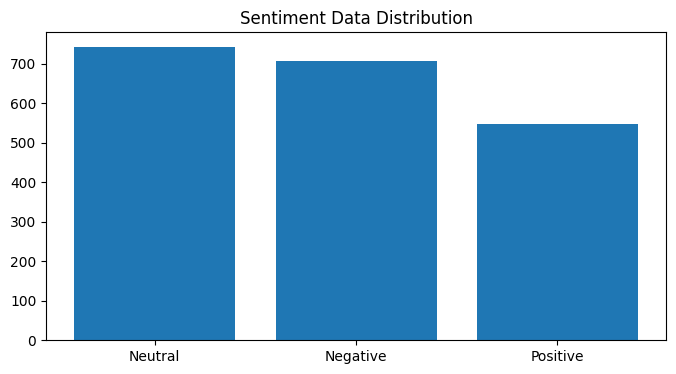

In [59]:
# show the sentiment distribution by bar chart
val_count = results_df.Emotion.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["waitrose", "amp", "to", "on", "daily","I","today","Waitrose"]
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
results_df['Tweet'] = results_df['Tweet'].apply(lambda text: cleaning_stopwords(text))
results_df['Tweet'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    ' 'Okay pavements pedestrians Or shall start w...
1    ' Fee Verte Believe call boomers This country ...
2    ' ' hi wondering it’s possible add points card...
3    ' ' cares saw many brands dumped rural road in...
4    ' 'Our Renewable Biomethane CNG helped achieve...
Name: Tweet, dtype: object

In [62]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
results_df['Tweet']= results_df['Tweet'].apply(lambda x: stemming_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [64]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
results_df['Tweet'] = results_df['Tweet'].apply(lambda x: lemmatizer_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Sentiment_Score,Negative,Neutral,Positive,Emotion
0,' 'Okay pavements pedestrians Or shall start w...,[0.6287569 0.33168265 0.03956049],0.628757,0.331683,0.039560,Negative
1,' Fee Verte Believe call boomers This country ...,[0.7958775 0.17430452 0.02981799],0.795878,0.174305,0.029818,Negative
2,' ' hi wondering it’s possible add points card...,[0.3393444 0.60701287 0.05364273],0.339344,0.607013,0.053643,Neutral
3,' ' cares saw many brands dumped rural road in...,[0.73435605 0.23647848 0.0291655 ],0.734356,0.236478,0.029166,Negative
4,' 'Our Renewable Biomethane CNG helped achieve...,[0.01482898 0.3091345 0.67603654],0.014829,0.309134,0.676037,Positive
...,...,...,...,...,...,...
1995,' ' robert Seth ',[0.12531494 0.73127127 0.14341381],0.125315,0.731271,0.143414,Neutral
1996,' ' Foundation favourite utd player go beyond ...,[0.00219355 0.03730524 0.9605012 ],0.002194,0.037305,0.960501,Positive
1997,' ' Looks like school dinner pizza :face_with_...,[0.00971865 0.22350991 0.7667715 ],0.009719,0.223510,0.766772,Positive
1998,' PMurray That's another question seem recall ...,[0.5905566 0.38060284 0.02884059],0.590557,0.380603,0.028841,Negative


In [66]:
results_df.to_csv('clean.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = results_df['Tweet']
y = results_df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

In [266]:
# TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
# TfidfVectorizer.transform is used to map that vocabulary to test dataset so that the number of features
# in test data remain same as train data.
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

Training Accuracy : 0.9992852037169406
Test Accuracy : 0.5224625623960066
[[ 95  92  23]
 [ 52 148  31]
 [ 30  59  71]]


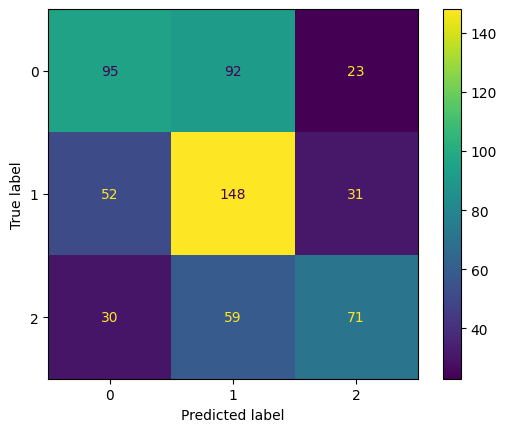

In [267]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 0.9992852037169406
Test Accuracy : 0.5041597337770383
[[ 87 113  10]
 [ 50 171  10]
 [ 35  80  45]]


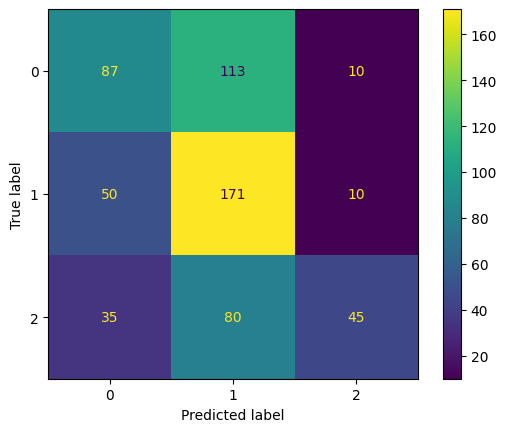

In [268]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
#sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

results_df['rating'] = results_df['Tweet'].apply(sia.polarity_scores)

get_value = lambda d: d['compound']
results_df["ss"] = results_df["rating"].apply(get_value)

def fun(row):
  if row["ss"] >= 0.2:
    return 'Positive'
  if row["ss"] <= -0.2:
    return 'Negative'
  return 'Neutral'

results_df["sentiment"]=results_df.apply(fun, axis=1)

results_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Tweet,Sentiment_Score,Negative,Neutral,Positive,Emotion,rating,ss,sentiment
0,' 'Okay pavements pedestrians Or shall start w...,[0.6287569 0.33168265 0.03956049],0.628757,0.331683,0.039560,Negative,"{'neg': 0.276, 'neu': 0.543, 'pos': 0.181, 'co...",-0.4767,Negative
1,' Fee Verte Believe call boomers This country ...,[0.7958775 0.17430452 0.02981799],0.795878,0.174305,0.029818,Negative,"{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'comp...",-0.6865,Negative
2,' ' hi wondering it’s possible add points card...,[0.3393444 0.60701287 0.05364273],0.339344,0.607013,0.053643,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,' ' cares saw many brands dumped rural road in...,[0.73435605 0.23647848 0.0291655 ],0.734356,0.236478,0.029166,Negative,"{'neg': 0.109, 'neu': 0.769, 'pos': 0.121, 'co...",0.0772,Neutral
4,' 'Our Renewable Biomethane CNG helped achieve...,[0.01482898 0.3091345 0.67603654],0.014829,0.309134,0.676037,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sentiment
Positive    1154
Neutral      461
Negative     385
Name: count, dtype: int64


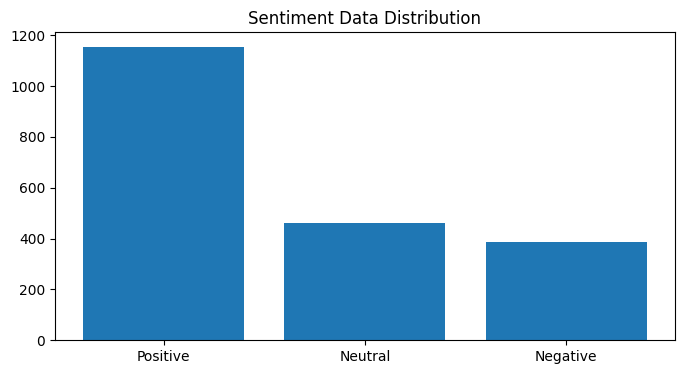

In [69]:
#bar chart of sentiment
val_count = results_df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
print(val_count)

In [271]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = results_df['Tweet']
y = results_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

In [272]:
# TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

Training Accuracy : 0.9949964260185847
Test Accuracy : 0.5757071547420965
[[ 19  16  72]
 [ 16  22 109]
 [ 19  23 305]]


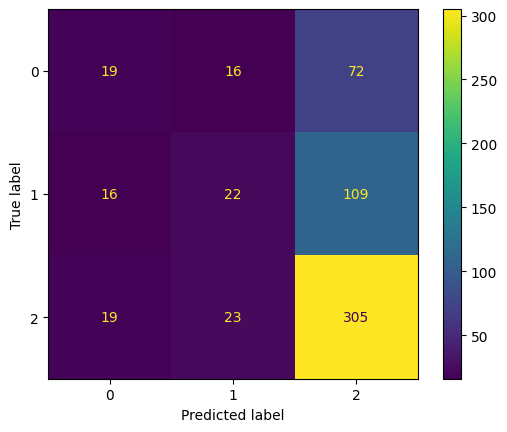

In [273]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 0.9964260185847034
Test Accuracy : 0.5923460898502496
[[  2   1 104]
 [  1  11 135]
 [  1   3 343]]


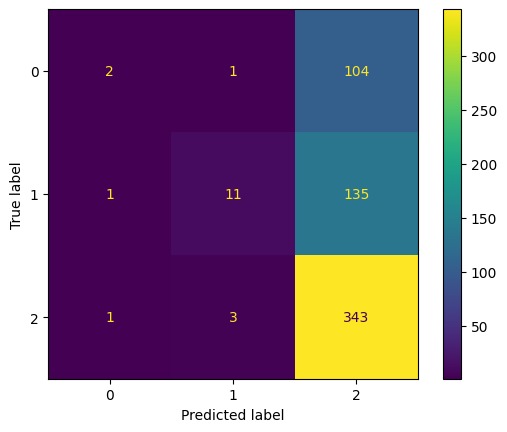

In [274]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [275]:
# find the row with different sentiment result
different_rows = results_df[results_df['Emotion'] != results_df['sentiment']]

diff = results_df.loc[different_rows.index]
diff.to_csv('diff.csv')
diff



,Tweet,Sentiment_Score,Negative,Neutral,Positive,Emotion,rating,ss,sentiment
3,' ' cares saw many brands dumped rural road in...,[0.73435605 0.23647848 0.0291655 ],0.734356,0.236478,0.029166,Negative,"{'neg': 0.109, 'neu': 0.769, 'pos': 0.121, 'co...",0.0772,Neutral
4,' 'Our Renewable Biomethane CNG helped achieve...,[0.01482898 0.3091345 0.67603654],0.014829,0.309134,0.676037,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,' I've used getting years Nice know I'm 'value...,[0.5608375 0.31803268 0.12112983],0.560837,0.318033,0.121130,Negative,"{'neg': 0.176, 'neu': 0.383, 'pos': 0.441, 'co...",0.7096,Positive
7,' 'Fantastic suggestion Please consider elderl...,[0.15186378 0.60647327 0.24166296],0.151864,0.606473,0.241663,Neutral,"{'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'comp...",0.7096,Positive
8,' 'I signed open letter asking join protect UK...,[0.21149082 0.6405903 0.14791891],0.211491,0.640590,0.147919,Neutral,"{'neg': 0.11, 'neu': 0.694, 'pos': 0.196, 'com...",0.2732,Positive
...,...,...,...,...,...,...,...,...,...
1993,' ' impressed shop Rickmansworth buy great ack...,[0.775807 0.1835446 0.04064837],0.775807,0.183545,0.040648,Negative,"{'neg': 0.206, 'neu': 0.441, 'pos': 0.353, 'co...",0.6124,Positive
1994,' 'I signed open letter asking join protect UK...,[0.21149082 0.6405903 0.14791891],0.211491,0.640590,0.147919,Neutral,"{'neg': 0.11, 'neu': 0.694, 'pos': 0.196, 'com...",0.2732,Positive
1997,' ' Looks like school dinner pizza :face_with_...,[0.00971865 0.22350991 0.7667715 ],0.009719,0.223510,0.766772,Positive,"{'neg': 0.138, 'neu': 0.739, 'pos': 0.123, 'co...",-0.0772,Neutral
1998,' PMurray That's another question seem recall ...,[0.5905566 0.38060284 0.02884059],0.590557,0.380603,0.028841,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [281]:
results_df.to_csv('newresult.csv')

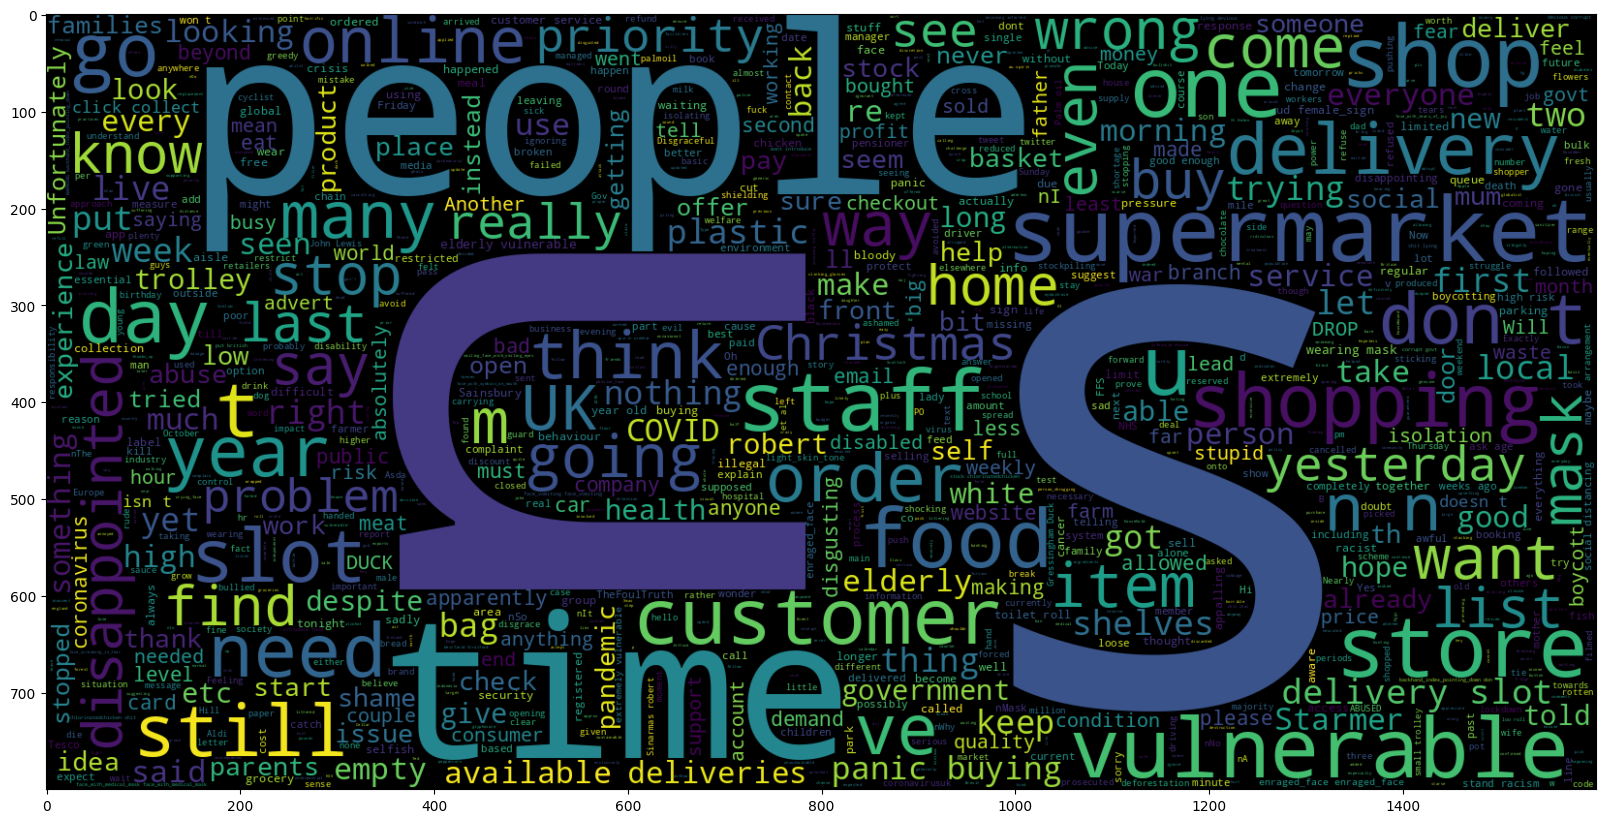

In [278]:
#show negative word cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(results_df[results_df.sentiment == 'Negative'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

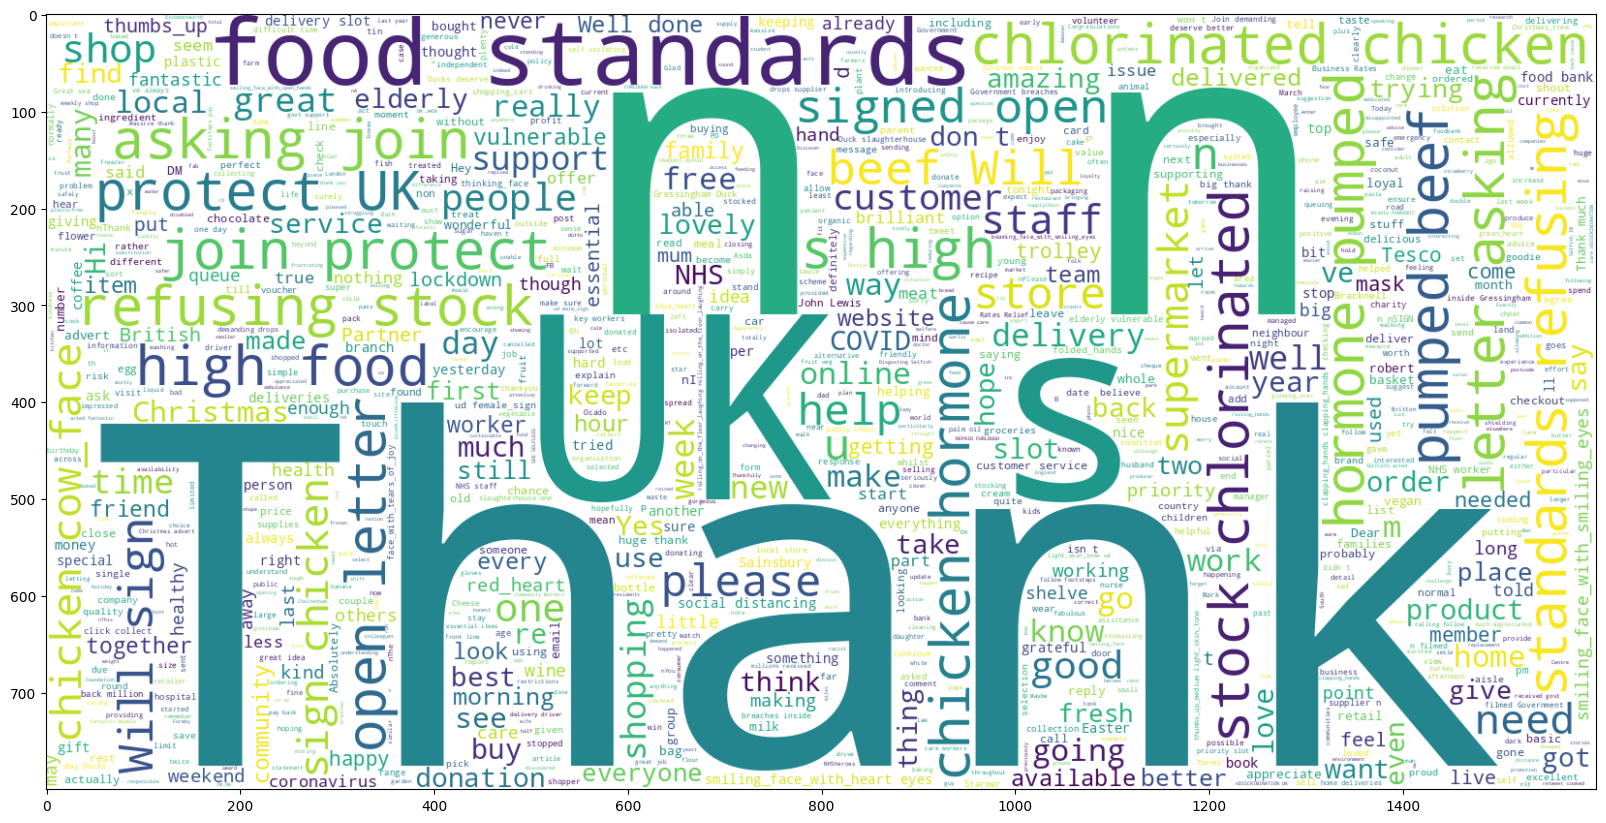

In [ ]:
# show positive word cloud
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(results_df[results_df.sentiment == 'Positive'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [4]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.7 MB/s eta 0:00:00


In [5]:
!pip install Gensim
!pip install spacy
!pip install vis
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [5]:
df1 = pd.read_csv('newresult.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# check missing value
df1['Tweet'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [7]:
# remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df1['Tweet'] = df1['Tweet'].apply(remove_punctuation)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#convert our sentences into tokens
stop_words = set(['the','a','_','I','today','Today','The','They','You','you','Im','It','it','its','Our','our','us','nn','This','this','To','to','in','on','In','On','at','At','We','we','My','my'])
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
          if word != '' and word not in stop_words:
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
df1['tokens']=df1.Tweet.apply(generate_tokens)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
print(df1.head())

   Unnamed: 0                                              Tweet  \
0           0   Okay pavements pedestrians Or shall start wal...   
1           1   Fee Verte Believe call boomers This country f...   
2           2    hi wondering its possible add points card re...   
3           3    cares saw many brands dumped rural road incl...   
4           4   Our Renewable Biomethane CNG helped achieve C...   

                      Sentiment_Score  Negative   Neutral  Positive   Emotion  \
0  [0.6287569  0.33168265 0.03956049]  0.628757  0.331683  0.039560  Negative   
1  [0.7958775  0.17430452 0.02981799]  0.795878  0.174305  0.029818  Negative   
2  [0.3393444  0.60701287 0.05364273]  0.339344  0.607013  0.053643   Neutral   
3  [0.73435605 0.23647848 0.0291655 ]  0.734356  0.236478  0.029166  Negative   
4  [0.01482898 0.3091345  0.67603654]  0.014829  0.309134  0.676037  Positive   

                                              rating      ss sentiment  \
0  {'neg': 0.276, 'neu': 0.543

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#creat dictionary for LDA model
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df1['tokens'])
print(id2word)

Dictionary<9520 unique tokens: ['Okay', 'Or', 'PS', 'add', 'around']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df1['tokens'],id2word)
print(df1['tokens'][0])
print(corpus[0])

['Okay', 'pavements', 'pedestrians', 'Or', 'shall', 'start', 'walking', 'around', 'road', 'PS', 'add', 'injury', 'insult', 'idling', 'well']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# define LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# print choosing tokens
for topic_id, topic_tokens in lda_model.show_topics(num_topics=10, num_words=50, formatted=False):
    print(f"Topic {topic_id}:")
    for token, weight in topic_tokens:
        print(f"- {token}")
    print()

Topic 0:
- people
- n
- get
- still
- staff
- go
- food
- local
- know
- store
- like
- Thank
- stores
- supermarket
- could
- going
- day
- But
- take
- customers
- elderly
- less
- free
- time
- What
- chicken
- would
- find
- British
- supermarkets
- back
- done
- need
- make
- shop
- good
- home
- Christmas
- times
- shelves
- one
- team
- week
- items
- making
- buying
- saying
- keep
- dont
- help

Topic 1:
- get
- vulnerable
- delivery
- would
- shopping
- help
- A
- shop
- need
- still
- well
- people
- way
- staff
- week
- thank
- Thanks
- go
- please
- cant
- got
- local
- food
- customers
- buy
- year
- family
- two
- give
- also
- take
- Hi
- And
- getting
- like
- store
- sell
- available
- done
- If
- times
- fruit
- trying
- supermarkets
- keep
- support
- Thank
- Please
- coronavirus
- Its

Topic 2:
- n
- store
- food
- help
- time
- one
- local
- delivery
- work
- Thank
- slots
- people
- need
- shopping
- back
- would
- Thanks
- customer
- yesterday
- How
- could
- se

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.181957  0.011247       1        1  14.129711
9     -0.020206  0.050860       2        1  11.263758
8     -0.099993  0.121711       3        1  11.024515
7      0.071889 -0.041961       4        1  10.483913
0      0.146265 -0.031103       5        1  10.421039
4      0.128424  0.078439       6        1   9.425849
6      0.025475  0.129861       7        1   9.033087
1      0.052905 -0.141219       8        1   8.457615
2     -0.082517 -0.044544       9        1   7.899236
3     -0.040286 -0.133292      10        1   7.861276, topic_info=              Term        Freq       Total Category  logprob  loglift
118       refusing  107.000000  107.000000  Default  30.0000  30.0000
113  hormonepumped  107.000000  107.000000  Default  29.0000  29.0000
110    chlorinated  109.000000  109.000000  Default  28.0000  28.0000
104            UKs  107.000000  107.000000  Default  27.0000  27.0000
120         signed  105.000000  105.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
433   supermarkets    5.642037   77.697639  Topic10  -6.1765  -0.0794
560           help    5.616331   82.571334  Topic10  -6.1811  -0.1448
194            buy    5.122336   48.784149  Topic10  -6.2731   0.2894
153           take    4.852626   36.481180  Topic10  -6.3272   0.5259
82            need    4.935353  103.436482  Topic10  -6.3103  -0.4993

[774 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
837       1  0.077064         A
837       2  0.077064         A
837       3  0.102753         A
837       4  0.077064         A
837       5  0.128441         A
...     ...       ...       ...
7317      8  0.641216       جيش
3884      3  0.822756      دیگه
4149      7  0.429778  سودانيين
7474      3  0.454862       شرم
5195     10  0.876781       واق

[2131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 9, 8, 1, 5, 7, 2, 3, 4])